In [1]:
import os
import pathlib
import time

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly_resampler import unregister_plotly_resampler

from neuralprophet import NeuralProphet, set_random_seed

In [2]:
# Important to set seed for reproducibility
set_random_seed(21)


def get_system_speed():
    repeats = 5
    benchmarks = np.array([])
    for a in range(0, repeats):
        start = time.time()
        for i in range(0, 1000):
            for x in range(1, 1000):
                3.141592 * 2**x
            for x in range(1, 1000):
                float(x) / 3.141592
            for x in range(1, 1000):
                float(3.141592) / x

        end = time.time()
        duration = end - start
        duration = round(duration, 3)
        benchmarks = np.append(benchmarks, duration)

    print(f"System speed: {round(np.mean(benchmarks), 5)}s")
    print(f"Standart deviation: {round(np.std(benchmarks), 5)}s")
    return benchmarks.mean(), benchmarks.std()

In [3]:
def create_metrics_plot(metrics):
    # Deactivate the resampler since it is not compatible with kaleido (image export)
    unregister_plotly_resampler()

    # Plotly params
    prediction_color = "#2d92ff"
    actual_color = "black"
    line_width = 2
    xaxis_args = {"showline": True, "mirror": True, "linewidth": 1.5, "showgrid": False}
    yaxis_args = {
        "showline": True,
        "mirror": True,
        "linewidth": 1.5,
        "showgrid": False,
        "rangemode": "tozero",
        "type": "log",
    }
    layout_args = {
        "autosize": True,
        "template": "plotly_white",
        "margin": go.layout.Margin(l=0, r=10, b=0, t=30, pad=0),
        "font": dict(size=10),
        "title": dict(font=dict(size=10)),
        "width": 1000,
        "height": 200,
    }

    metric_cols = [col for col in metrics.columns if not ("_val" in col or col == "RegLoss" or col == "epoch")]
    fig = make_subplots(rows=1, cols=len(metric_cols), subplot_titles=metric_cols)
    for i, metric in enumerate(metric_cols):
        fig.add_trace(
            go.Scatter(
                y=metrics[metric],
                name=metric,
                mode="lines",
                line=dict(color=prediction_color, width=line_width),
                legendgroup=metric,
            ),
            row=1,
            col=i + 1,
        )
        if f"{metric}_val" in metrics.columns:
            fig.add_trace(
                go.Scatter(
                    y=metrics[f"{metric}_val"],
                    name=f"{metric}_val",
                    mode="lines",
                    line=dict(color=actual_color, width=line_width),
                    legendgroup=metric,
                ),
                row=1,
                col=i + 1,
            )
        if metric == "Loss":
            fig.add_trace(
                go.Scatter(
                    y=metrics["RegLoss"],
                    name="RegLoss",
                    mode="lines",
                    line=dict(color=actual_color, width=line_width),
                    legendgroup=metric,
                ),
                row=1,
                col=i + 1,
            )
    fig.update_xaxes(xaxis_args)
    fig.update_yaxes(yaxis_args)
    fig.update_layout(layout_args)
    return fig

In [4]:
DIR = "~/github/neural_prophet"
DATA_DIR = os.path.join(DIR, "tests", "test-data")
PEYTON_FILE = os.path.join(DATA_DIR, "wp_log_peyton_manning.csv")
AIR_FILE = os.path.join(DATA_DIR, "air_passengers.csv")
YOS_FILE = os.path.join(DATA_DIR, "yosemite_temps.csv")
ENERGY_PRICE_DAILY_FILE = os.path.join(DATA_DIR, "tutorial04_kaggle_energy_daily_temperature.csv")

In [5]:
df = pd.read_csv(YOS_FILE)

In [6]:
m = NeuralProphet(
    n_lags=36,
    n_forecasts=12,
    changepoints_range=0.9,
    n_changepoints=30,
    weekly_seasonality=False,
)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
WARNING - (NP.data.processing._handle_missing_data) - 12 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 12 NaN values in column y were auto-imputed.
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.994% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils

System speed: 0.405s
Standart deviation: 0.02043s


INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 90
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (132) is too small than the required number                     for the learning rate finder (255). The results might not be optimal.


Finding best initial lr:   0%|          | 0/255 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

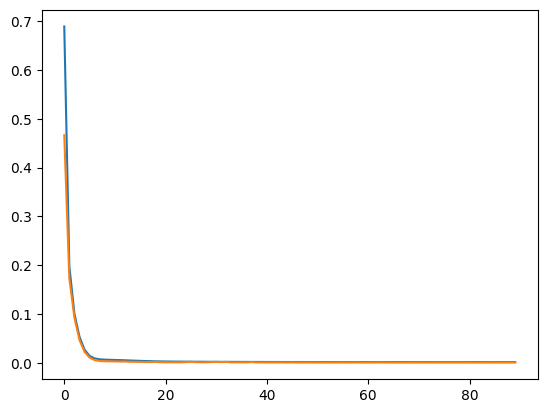

In [7]:
df_train, df_test = m.split_df(df=df, freq="5min", valid_p=0.1)

system_speed, std = get_system_speed()
start = time.time()

metrics = m.fit(df_train, validation_df=df_test, freq="5min")  # , early_stopping=True)
# metrics = m.fit(df_train, validation_df=df_test, freq="5min", progress='plot')  # , early_stopping=True)

end = time.time()

In [8]:
create_metrics_plot(metrics)

In [9]:
metrics.to_dict("records")[-1]

{'MAE_val': 0.6343640685081482,
 'RMSE_val': 0.9070782661437988,
 'Loss_val': 0.00047732196981087327,
 'RegLoss_val': 0.0,
 'epoch': 89,
 'MAE': 1.0004780292510986,
 'RMSE': 1.7405403852462769,
 'Loss': 0.0012887082993984222,
 'RegLoss': 0.0}

In [10]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
89,0.634364,0.907078,0.000477,0.0,89,1.000478,1.74054,0.001289,0.0


In [11]:
forecast = m.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min


INFO - (NP.df_utils._infer_frequency) - Major frequency 5T corresponds to 99.995% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 5min
WARNING - (NP.data.processing._handle_missing_data) - 12 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 12 NaN values in column y were auto-imputed.


Predicting: 132it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [12]:
m.highlight_nth_step_ahead_of_each_forecast(m.n_forecasts)
fig = m.plot(forecast)
fig.show()

In [13]:
fig_comp = m.plot_components(forecast)
fig_comp.show()

In [14]:
fig_param = m.plot_parameters()
fig_param.show()